In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
# 2020년 독서량 파일

In [3]:
df = pd.read_csv('data/NL_READ_QY_2020.csv')

In [4]:
df

,ANALS_TRGET_YEAR,ANALS_TRGET_MT,AREA_NM,AGE_FLAG_NM,SEXDSTN_FLAG_NM,LON_CO,LON_MBER_CO,READ_QY
0,2020,1,강원도,영유아(0-5),남자,1480,182,8.132
1,2020,1,강원도,영유아(0-5),여자,1403,150,9.353
2,2020,1,강원도,유아(6-7),남자,2108,246,8.569
3,2020,1,강원도,유아(6-7),여자,1774,208,8.529
4,2020,1,강원도,초등(8-13),남자,12535,1515,8.274
...,...,...,...,...,...,...,...,...
3667,2020,12,충청북도,40대,여자,24070,3051,7.889
3668,2020,12,충청북도,50대,남자,4278,648,6.602
3669,2020,12,충청북도,50대,여자,5090,814,6.253
3670,2020,12,충청북도,60대이상,남자,4128,537,7.687


In [5]:
df = df.rename(columns={'ANALS_TRGET_YEAR' : '년도', 'ANALS_TRGET_MT' : '월', 'AREA_NM' : '지역', 'AGE_FLAG_NM' : '연령', 
                        'SEXDSTN_FLAG_NM' : '성별', 'LON_CO' : '회원수','LON_MBER_CO' : '대출건수','READ_QY' : '독서량'})

In [6]:
df

,년도,월,지역,연령,성별,회원수,대출건수,독서량
0,2020,1,강원도,영유아(0-5),남자,1480,182,8.132
1,2020,1,강원도,영유아(0-5),여자,1403,150,9.353
2,2020,1,강원도,유아(6-7),남자,2108,246,8.569
3,2020,1,강원도,유아(6-7),여자,1774,208,8.529
4,2020,1,강원도,초등(8-13),남자,12535,1515,8.274
...,...,...,...,...,...,...,...,...
3667,2020,12,충청북도,40대,여자,24070,3051,7.889
3668,2020,12,충청북도,50대,남자,4278,648,6.602
3669,2020,12,충청북도,50대,여자,5090,814,6.253
3670,2020,12,충청북도,60대이상,남자,4128,537,7.687


In [7]:
df = df.loc[: ,'월' :]

In [8]:
df['월'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12], dtype=int64)

In [9]:
df['지역'].unique()

array(['강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시',
       '서울특별시', '세종특별자치시', '울산광역시', '인천광역시', '전라남도', '전라북도', '제주특별자치도',
       '충청남도', '충청북도'], dtype=object)

In [10]:
df['연령'].unique()

array(['영유아(0-5)', '유아(6-7)', '초등(8-13)', '청소년(14-19)', '20대', '30대',
       '40대', '50대', '60대이상'], dtype=object)

In [11]:
# 월별과 연령대별 독서량 바차트로 나타내기

In [12]:
# 월별 독서량
MONTH = df.groupby('월')['독서량'].mean()

In [13]:
MONTH.to_frame().reset_index()

,월,독서량
0,1,7.254565
1,2,6.472082
2,3,5.428286
3,4,6.421508
4,5,7.179157
5,6,7.219373
6,7,7.604755
7,8,7.032709
8,10,7.515830
9,11,7.947585


In [14]:
MONTH = MONTH.to_frame()

In [15]:
MONTH.loc[ MONTH['독서량'] == MONTH['독서량'].max() ].index.tolist()[0]

12

In [16]:
# 연령대 독서량
AGE = df.groupby('연령')['독서량'].mean()

In [17]:
AGE = AGE.to_frame()

In [18]:
max_AGE = AGE.loc[ AGE['독서량'] == AGE['독서량'].max() ].index.tolist()[0]

In [19]:
max_AGE

'유아(6-7)'

In [20]:
# 월별 연령대 독서량 / 연령대별 월 독서량

In [21]:
MONTH_AGE = df[['월','연령', '독서량']]

In [22]:
choice_Month = MONTH_AGE.loc[ MONTH_AGE['월'] == 1 ]

In [23]:
choice_Month.sort_values('연령')

,월,연령,독서량
152,1,20대,3.716
261,1,20대,4.069
44,1,20대,3.553
45,1,20대,3.942
260,1,20대,4.124
...,...,...,...
275,1,초등(8-13),10.260
131,1,초등(8-13),9.745
23,1,초등(8-13),10.016
203,1,초등(8-13),7.550


In [24]:
# 1월의 연령대별 독서량
choice_Month.groupby('연령')['독서량'].mean().to_frame()

,독서량
연령,
20대,4.120794
30대,7.093647
40대,7.485794
50대,5.698765
60대이상,6.785206
영유아(0-5),10.266824
유아(6-7),10.127559
청소년(14-19),4.693971
초등(8-13),9.018529


In [25]:
# 지역별 독서량 (파이차트)

In [26]:
df

,월,지역,연령,성별,회원수,대출건수,독서량
0,1,강원도,영유아(0-5),남자,1480,182,8.132
1,1,강원도,영유아(0-5),여자,1403,150,9.353
2,1,강원도,유아(6-7),남자,2108,246,8.569
3,1,강원도,유아(6-7),여자,1774,208,8.529
4,1,강원도,초등(8-13),남자,12535,1515,8.274
...,...,...,...,...,...,...,...
3667,12,충청북도,40대,여자,24070,3051,7.889
3668,12,충청북도,50대,남자,4278,648,6.602
3669,12,충청북도,50대,여자,5090,814,6.253
3670,12,충청북도,60대이상,남자,4128,537,7.687


In [27]:
AREA_READQY = df.groupby('지역')['독서량'].mean()

In [28]:
AREA_READQY

지역
강원도        6.333898
경기도        7.800917
경상남도       6.658856
경상북도       6.481449
광주광역시      6.851926
대구광역시      8.389634
대전광역시      7.242171
부산광역시      7.242787
서울특별시      6.399347
세종특별자치시    6.382480
울산광역시      6.531421
인천광역시      6.421523
전라남도       7.743736
전라북도       7.513921
제주특별자치도    7.144417
충청남도       7.893074
충청북도       8.039347
Name: 독서량, dtype: float64

In [29]:
AREA_READQY = AREA_READQY.to_frame()

In [30]:
AREA_READQY = AREA_READQY.reset_index()

In [31]:
# 독서량이 제일 높은 지역

In [32]:
max_AREA_READQY = AREA_READQY.loc[ AREA_READQY['독서량'] == AREA_READQY['독서량'].max() ]

In [33]:
max_AREA_READQY['지역'].tolist()

['대구광역시']

In [34]:
# 대출 회원수가 가장 많은 지역

In [35]:
AREA_LON = df.groupby('지역')['회원수'].sum()

In [36]:
AREA_LON.to_frame()

,회원수
지역,
강원도,1332649
경기도,21296345
경상남도,2909381
경상북도,1673717
광주광역시,1023397
대구광역시,3945555
대전광역시,1789118
부산광역시,4649695
서울특별시,12302455


In [37]:
AREA_LON = AREA_LON.to_frame()

In [38]:
AREA_LON.loc[ AREA_LON['회원수'] == AREA_LON['회원수'].max() ]

,회원수
지역,
경기도,21296345


In [39]:
# 대출 회원수가 가장 많은 지역

In [40]:
AREA_LONMBER = df.groupby('지역')['대출건수'].sum()

In [41]:
AREA_LONMBER = AREA_LONMBER.to_frame()

In [42]:
AREA_LONMBER.loc[ AREA_LONMBER['대출건수'] == AREA_LONMBER['대출건수'].max() ]

,대출건수
지역,
경기도,2753427


In [43]:
# 대출 회원수가 많아서 건수도 많다

In [44]:
df.corr()

,월,회원수,대출건수,독서량
월,1.000000,0.060114,0.033127,0.189145
회원수,0.060114,1.000000,0.970166,0.120781
대출건수,0.033127,0.970166,1.000000,0.020098
독서량,0.189145,0.120781,0.020098,1.000000


C:\Users\5-13\anaconda3\envs\YH\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.draw()
C:\Users\5-13\anaconda3\envs\YH\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 54924 (\N{HANGUL SYLLABLE HOE}) missing from current font.
  fig.canvas.draw()
C:\Users\5-13\anaconda3\envs\YH\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.draw()
C:\Users\5-13\anaconda3\envs\YH\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.draw()
C:\Users\5-13\anaconda3\envs\YH\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.draw()
C:\Users\5-13\anaconda3\envs\YH\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from current font.
  fig

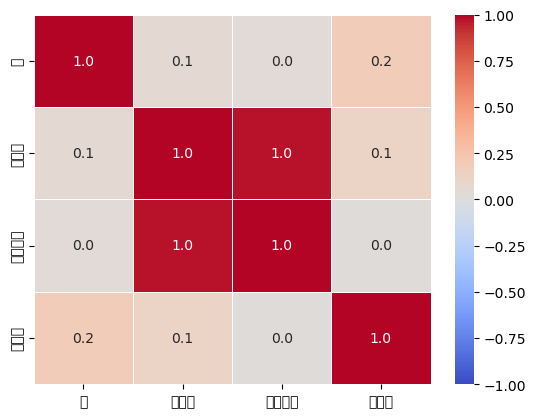

In [45]:
sb.heatmap(data= df.corr(), annot=True, fmt='.1f', cmap= 'coolwarm', linewidths= 0.7, vmin= -1, vmax= 1)
plt.show()

In [46]:
# 전국 연령대별 회원수와 대출건수

In [47]:
df.groupby('회원수')[['회원수','대출건수']].sum()

,회원수,대출건수
회원수,,
0,0,0
1,1,1
3,9,3
5,10,4
6,12,3
...,...,...
458817,458817,54445
475992,475992,63067
535260,535260,59797


In [48]:
# 특정 지역의 연령대별 회원수와 대출건수

In [49]:
df

,월,지역,연령,성별,회원수,대출건수,독서량
0,1,강원도,영유아(0-5),남자,1480,182,8.132
1,1,강원도,영유아(0-5),여자,1403,150,9.353
2,1,강원도,유아(6-7),남자,2108,246,8.569
3,1,강원도,유아(6-7),여자,1774,208,8.529
4,1,강원도,초등(8-13),남자,12535,1515,8.274
...,...,...,...,...,...,...,...
3667,12,충청북도,40대,여자,24070,3051,7.889
3668,12,충청북도,50대,남자,4278,648,6.602
3669,12,충청북도,50대,여자,5090,814,6.253
3670,12,충청북도,60대이상,남자,4128,537,7.687


In [50]:
df2 = df[['지역','연령','회원수','대출건수']]

In [51]:
df2 = df2.loc[ df2['지역'] == '강원도' ]

In [52]:
df2.groupby('지역')[['회원수','대출건수']].sum()

,회원수,대출건수
지역,,
강원도,1332649,210665


In [53]:
df.to_csv('READ_QY_2020.csv')